<a href="https://colab.research.google.com/github/LJ1201/MSDS-490-Bank_Campaign/blob/main/MSDS_498_BankMkt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [166]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [167]:
url = 'https://raw.githubusercontent.com/ShawnLiu119/CapstoneProject_BankingMarketing/main/rawdata/bank-additional-full.csv'
data = pd.read_csv(url, sep=';')

In [168]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [170]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from matplotlib import colors

Categorical variables

In [171]:
dt = data.dtypes
objList = []

for i in dt.index:
  if dt[i] in ["object"]:objList.append(i)

print(objList)


['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [172]:
data1 = data.copy()

Job

In [173]:
data['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

job
0 = unknown
1 = unemployed
2 = employed

In [174]:
unemployed = ['retired', ' unemployed','student']
unknown = ['unknown']

for i in range(0,len(data)):
  if data1['job'][i] in unemployed:
    data1['job'][i] = 1
  elif data1['job'][i] in unknown:
    data1['job'][i] = 0
  else:
    data1['job'][i] = 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [175]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [176]:
data1['job'].value_counts()

2    38263
1     2595
0      330
Name: job, dtype: int64

marital status

In [177]:
data1['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [178]:
for i in range(0,len(data)):
  if data1['marital'][i] == "married":
    data1['marital'][i] = 3
  elif data1['marital'][i] == "single":
    data1['marital'][i] = 2
  elif data1['marital'][i] == "divorced":
    data1['marital'][i] = 1   
  else:
    data1['marital'][i] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib

In [179]:
'''
3 = married
2 = single
1 = divorced
0 = unknown
'''

data1['marital'].value_counts()

3    24928
2    11568
1     4612
0       80
Name: marital, dtype: int64

education variable

In [180]:
data['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

pre high school = [illiterate, basic.9y, basic.4y, basic.6y]

high school = [high school]

post high school = 'professional.course','university.degree']


In [181]:
pre_high = ['basic.9y','basic.4y','basic.6y','illiterate']

post_high = ['professional.course','university.degree']


for i in range(0,len(data1)):
  if data1['education'][i] in pre_high:
    data1['education'][i] = 1
  elif data1['education'][i] in post_high:
    data1['education'][i] = 3
  elif data1['education'][i] == 'unknown':
    data1['education'][i] =0
  else:
    data1['education'][i] = 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_laun

In [182]:
data1['education'].value_counts()

3    17411
1    12531
2     9515
0     1731
Name: education, dtype: int64

In [183]:
data['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [184]:
'''
default:
1 = yes
0 = no
0.5 = unknown
'''


for i in range(0,len(data1)):
  if data1['default'][i] =="yes":
    data1['default'][i] = 1
  elif data1['default'][i] in "no":
    data1['default'][i] = 0
  else:
    data1['default'][i] =0.5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_pa

In [185]:
data1['default'].value_counts()

0.0    32588
0.5     8597
1.0        3
Name: default, dtype: int64

In [186]:
data1['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [187]:
'''
housing:
1 = yes
0 = no
0.5 = unknown
'''


for i in range(0,len(data1)):
  if data1['housing'][i] =="yes":
    data1['housing'][i] = 1
  elif data1['housing'][i] in "no":
    data1['housing'][i] = 0
  else:
    data1['housing'][i] =0.5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as

In [188]:
data1['housing'].value_counts()

1.0    21576
0.0    18622
0.5      990
Name: housing, dtype: int64

In [189]:
data['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [190]:
'''
loan:
1 = yes
0 = no
0.5 = unknown
'''


for i in range(0,len(data1)):
  if data1['loan'][i] =="yes":
    data1['loan'][i] = 1
  elif data1['loan'][i] in "no":
    data1['loan'][i] = 0
  else:
    data1['loan'][i] =0.5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as

In [191]:
data1['loan'].value_counts()

0.0    33950
1.0     6248
0.5      990
Name: loan, dtype: int64

In [192]:
data['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [193]:
'''
contact:
1 = cellular
0 = telephone
'''


for i in range(0,len(data1)):
  if data1['contact'][i] =="cellular":
    data1['contact'][i] = 1
  elif data1['contact'][i] in "telephone":
    data1['contact'][i] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [194]:
data1['contact'].value_counts()

1    26144
0    15044
Name: contact, dtype: int64

In [195]:
data['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [196]:
# for i in range(0,len(data1)):
#   if data1['month'][i] =="dec":
#     data1['month'][i] = 12
#   elif data1['month'][i] in "nov":
#     data1['month'][i] = 11
#   elif data1['month'][i] in "oct":
#     data1['month'][i] = 10
#   elif data1['month'][i] in "sep":
#     data1['month'][i] = 9
#   elif data1['month'][i] in "aug":
#     data1['month'][i] = 8
#   elif data1['month'][i] in "jul":
#     data1['month'][i] = 7
#   elif data1['month'][i] in "jun":
#     data1['month'][i] = 6
#   elif data1['month'][i] in "may":
#     data1['month'][i] = 5
#   elif data1['month'][i] in "apr":
#     data1['month'][i] = 4
#   elif data1['month'][i] in "mar":
#     data1['month'][i] = 3
#   elif data1['month'][i] in "feb":
#     data1['month'][i] = 2
#   elif data1['month'][i] in "jan":
#     data1['month'][i] = 1


In [197]:
data['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [198]:
# for i in range(0,len(data1)):
#   if data1['day_of_week'][i] =="fri":
#     data1['day_of_week'][i] = 5
#   elif data1['day_of_week'][i] in "thu":
#     data1['day_of_week'][i] = 4
#   elif data1['day_of_week'][i] in "wed":
#     data1['day_of_week'][i] = 3
#   elif data1['day_of_week'][i] in "tue":
#     data1['day_of_week'][i] = 2
#   elif data1['day_of_week'][i] in "mon":
#     data1['day_of_week'][i] = 1


In [199]:
data['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [200]:
'''
poutcome:
1 = success         
0 = failure
0.5 = nonexistent    
'''


for i in range(0,len(data1)):
  if data1['poutcome'][i] =="success":
    data1['poutcome'][i] = 1
  elif data1['poutcome'][i] == "failure":
    data1['poutcome'][i] = 0
  else:
    data1['poutcome'][i] =0.5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_pa

In [201]:
data1['poutcome'].value_counts()

0.5    35563
0.0     4252
1.0     1373
Name: poutcome, dtype: int64

In [202]:
data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [203]:
for i in range(0,len(data1)):
  if data1['y'][i] =="yes":
    data1['y'][i] = 1
  elif data1['y'][i] == "no":
    data1['y'][i] = 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


**Distribution Exploration**



In [204]:
def create_hist(data, title):
    fig, axs = plt.subplots(1, 1,figsize =(10, 7), tight_layout = True)
    axs.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.6)
    axs = sns.distplot(data, hist=True).set(title=title + ' Distribution')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


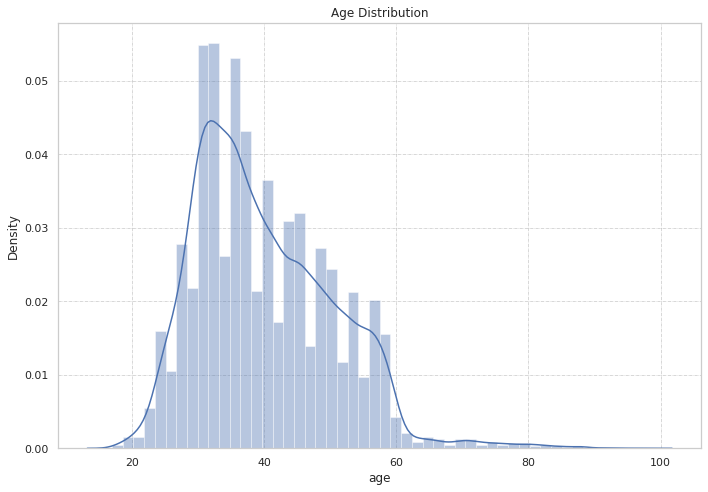

In [205]:
create_hist(data['age'], 'Age')

In [206]:
df_y = data[data['y'] == 'yes']
df_n = data[data['y'] =='no']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


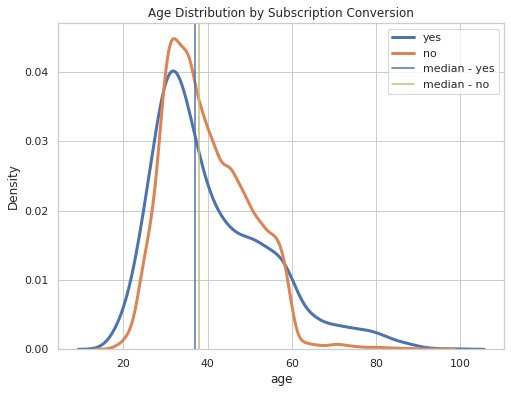

In [207]:
plt.figure(figsize=(8,6))
sns.distplot(df_y['age'], hist = False, kde = True, kde_kws = {'linewidth': 3},label = 'yes')
sns.distplot(df_n['age'], hist = False, kde = True, kde_kws = {'linewidth': 3},label = 'no')    

median_y = df_y['age'].median()
median_n = df_n['age'].median()

plt.axvline(x = median_y, color = 'b', label = 'median - yes')
plt.axvline(x = median_n, color = 'y', label = 'median - no')

plt.title('Age Distribution by Subscription Conversion')

plt.legend()

In [208]:
print(median_y, median_n)

37.0 38.0


some insights: the distribution of customer who subscribed or did not susbcribed the term deposit are pretty similar, interetingly the median age of subscriber is even younger than who did not by 1 year

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


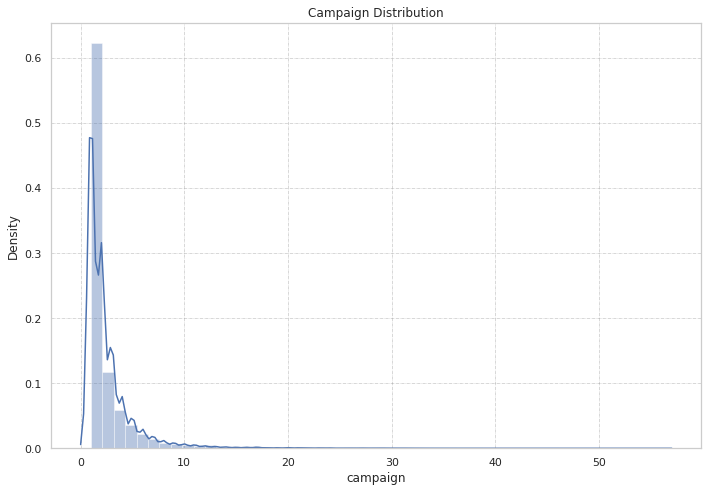

In [209]:
create_hist(data['campaign'], 'Campaign')

**Corrleation**

In [210]:
data.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


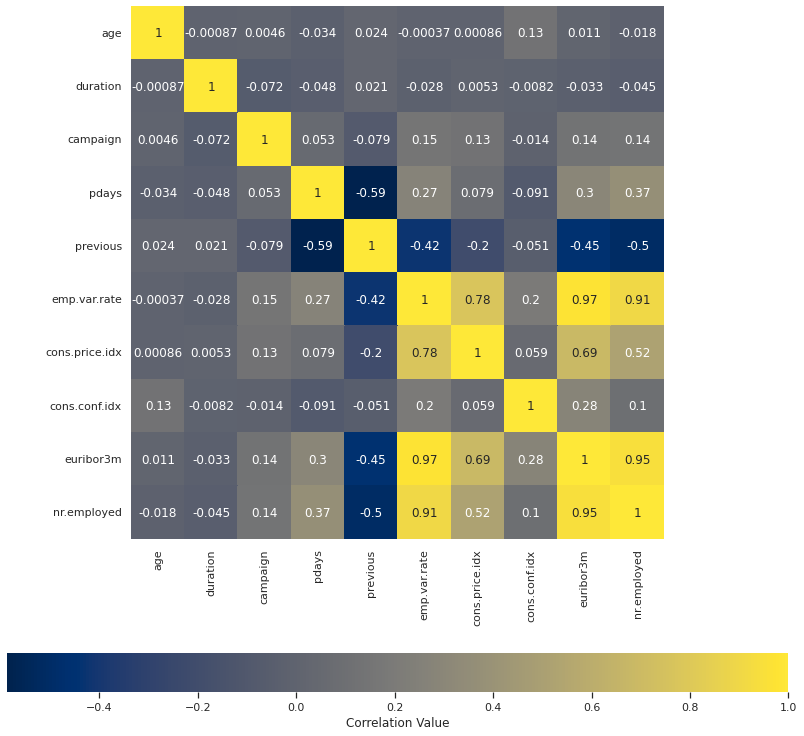

In [211]:
cor_df = data.corr()
plt.subplots(figsize = (14, 14))
sns.heatmap(cor_df,cmap = "cividis",annot = True, square = True, cbar_kws = {'label': 'Correlation Value', 'orientation': 'horizontal'});

**Conversion by different attribute**

In [212]:
data['binary'] = data['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [213]:
def conversion_bar(groupcol):
    df = pd.DataFrame(data.groupby(groupcol).apply(lambda x: x['binary'].sum()/len(x)).reset_index()).rename(columns={0:'conversion_rate'})
    fig, axs = plt.subplots(1, 1,figsize =(12, 5), tight_layout = True)
    sns.set_theme(style="whitegrid")
    ax = sns.barplot(x=groupcol, y='conversion_rate', data=df)
    ax.title.set_text('conversion rate by {}'.format(groupcol))
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


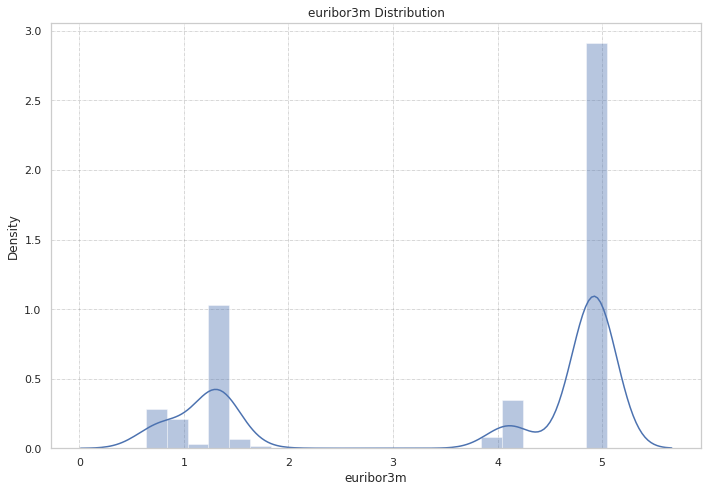

In [214]:
create_hist(data['euribor3m'], 'euribor3m')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


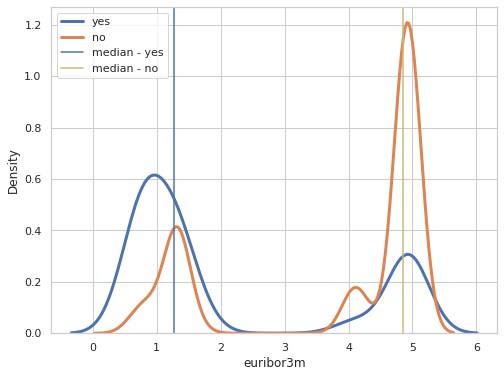

In [215]:
plt.figure(figsize=(8,6))
sns.distplot(df_y['euribor3m'], hist = False, kde = True, kde_kws = {'linewidth': 3},label = 'yes')
sns.distplot(df_n['euribor3m'], hist = False, kde = True, kde_kws = {'linewidth': 3},label = 'no')    

median_y = df_y['euribor3m'].median()
median_n = df_n['euribor3m'].median()

plt.axvline(x = median_y, color = 'b', label = 'median - yes')
plt.axvline(x = median_n, color = 'y', label = 'median - no')

plt.legend()

In [216]:
data['weekly'] = pd.cut(data["pdays"], np.arange(0, 90, 7))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in long_scalars
  


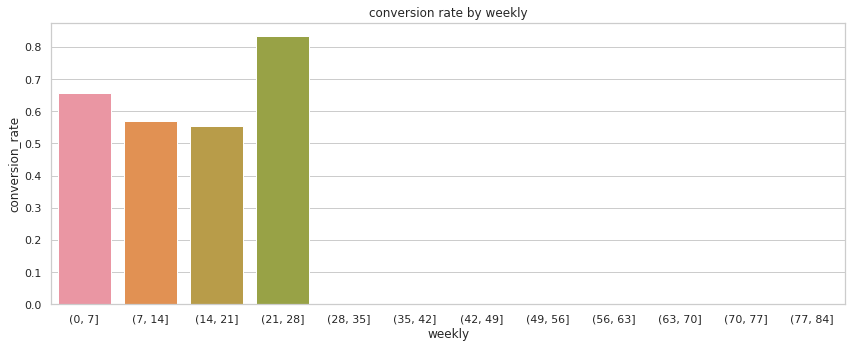

In [217]:
conversion_bar('weekly')

-people don't subscriber after 1 month following thg last contact
- conversion rate is higher when date get closer to 30 days

- holiday, people saves a lum sum of money,
- summer, people go vocation
- september, students start school
- there is no Jan, Feb data points

##Logistic Regression Model

In [218]:
data1.head().T

,0,1,2,3,4
age,56,57,37,40,56
job,2,2,2,2,2
marital,3,3,3,3,3
education,1,2,2,1,2
default,0,0.5,0,0,0
housing,0,0,1,0,0
loan,0,0,0,0,1
contact,0,0,0,0,0
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


In [219]:
new_objlist = ['month', 'day_of_week']

In [220]:
data1.columns


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [221]:
for i in data1.columns:
  if i in new_objlist:
    continue
  else:
    data1[i] = data1[i].astype('float')

# data1.age.dtype

In [222]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  float64
 1   job             41188 non-null  float64
 2   marital         41188 non-null  float64
 3   education       41188 non-null  float64
 4   default         41188 non-null  float64
 5   housing         41188 non-null  float64
 6   loan            41188 non-null  float64
 7   contact         41188 non-null  float64
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  float64
 11  campaign        41188 non-null  float64
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  float64
 14  poutcome        41188 non-null  float64
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [223]:
for i in new_objlist :
    thePrefix =  i
    y = pd.get_dummies( data1[i], prefix=thePrefix )   
    data1 = pd.concat( [data1, y], axis=1 )
    data1 = data1.drop( i, axis=1 )


In [224]:
data1.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,56.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,261.0,1.0,...,0,1,0,0,0,0,1,0,0,0
1,57.0,2.0,3.0,2.0,0.5,0.0,0.0,0.0,149.0,1.0,...,0,1,0,0,0,0,1,0,0,0
2,37.0,2.0,3.0,2.0,0.0,1.0,0.0,0.0,226.0,1.0,...,0,1,0,0,0,0,1,0,0,0
3,40.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,151.0,1.0,...,0,1,0,0,0,0,1,0,0,0
4,56.0,2.0,3.0,2.0,0.0,0.0,1.0,0.0,307.0,1.0,...,0,1,0,0,0,0,1,0,0,0


In [225]:
data1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'month_apr', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed'],
      dtype='object')

In [226]:
data1 = data1.drop("duration",axis = 1)

In [227]:
X = data1.loc[:, data1.columns != 'y']
y = data1.loc[:, data1.columns == 'y']


os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  51158
Number of no subscription in oversampled data 25579
Number of subscription 25579
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [228]:
data_final_vars=data1.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]



logreg = LogisticRegression(solver= 'liblinear')
rfe = RFE(logreg,n_features_to_select=20)
rfe = rfe.fit(os_data_X.values, os_data_y.values.ravel())

features = list(os_data_X.columns[rfe.support_])

print('total features:', os_data_X.shape[1])

print(rfe.support_)
print(features)
print(rfe.ranking_)

total features: 32
[False False False False  True False False  True False False  True  True
 False False False  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]
['default', 'contact', 'previous', 'poutcome', 'euribor3m', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed']
[10  7  6  8  1 11  3  1  5 13  1  1  2  4 12  1  9  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1]


In [229]:
features

['default',
 'contact',
 'previous',
 'poutcome',
 'euribor3m',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed']

In [230]:
X = os_data_X[features]
y = os_data_y['y']

In [231]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.400057
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.423     
Dependent Variable: y                AIC:              40972.2085
Date:               2022-07-30 23:22 BIC:              41149.0620
No. Observations:   51158            Log-Likelihood:   -20466.   
Df Model:           19               LL-Null:          -35460.   
Df Residuals:       51138            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
default          -0.5993   0.0732  -8.1857 0.0000 -0.7428 -0.4558
contact           1.6957   0.0407  41.6548 0.0000  1.6159  1.7755


In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [233]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.85


[[7072  588]
 [1710 5978]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


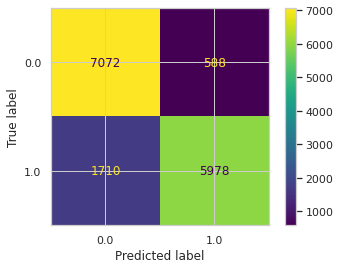

In [234]:
cm_1 = confusion_matrix(y_test, y_pred)
print(cm_1)
plot_confusion_matrix(logreg, X_test, y_test)  

In [235]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86      7660
         1.0       0.91      0.78      0.84      7688

    accuracy                           0.85     15348
   macro avg       0.86      0.85      0.85     15348
weighted avg       0.86      0.85      0.85     15348

